In [34]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Evaluation

Performing slide-based evaluation of the trained model. Results are presented as ROC-Curves and ROC-AUC values for two different ways of aggregating the patch-wise prediction into slide-wise predictions.

In [36]:
import matplotlib.pyplot as plt
from data.data_set import Dataset
from data.data_point import DataPoint 
from model.inceptionv3_model import InceptionModel
from evaluation.evaluation import Predictions
from evaluation.roc import evaluate_by_roc_curve
import matplotlib.pyplot as plt

test_dataset = Dataset('/home/dschacherer_fme/input/csv_test_norm_cancer_small.csv', num_classes=2)
model = InceptionModel(load_trained_model_from='/home/dschacherer_fme/output_test/trained_model')

predictions = Predictions(model, test_dataset) 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/jupyter/idc-pathomics-use-case-1/src/evaluation/evaluation.py:41: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Oranges"))
  cmap.set_over(alpha=0)
/home/jupyter/idc-pathomics-use-case-1/src/evaluation/evaluation.py:42: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Oranges"))
  cmap.set_under(alpha=0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


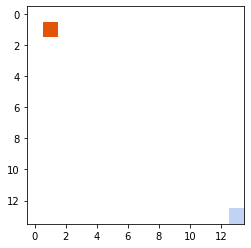

In [71]:
colormaps=[plt.get_cmap('coolwarm'), plt.get_cmap('coolwarm'), plt.get_cmap('Oranges')]
hm=predictions.create_heatmap_for_slide('TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a173-964e569e3985', colormaps)
#cmap = plt.get_cmap('coolwarm')
#cmap.set_under('k', alpha=0)
plt.imshow(hm)
#cmap(1)

#result_df = per_slide_evaluation(model, test_dataset)
#fig = plt.figure(figsize=(10, 7))
#evaluate_by_roc_curve(fig, result_df)
#plt.savefig('/home/dschacherer_fme/output_test/roc.png')

In [83]:
rd=predictions._prepare_data_for_roc_curves()
print(rd.head())

TCGA-55-8299-11A-01-TS1.ee910b9a-5cbe-46b3-8731-c6a72654e28b
TCGA-66-2734-11A-01-TS1.b901548f-84a1-4edf-b218-b35ed2116334
TCGA-94-7033-01A-01-TS1.d38f20aa-3a65-4af3-a58d-5837a5a4a631
TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a173-964e569e3985
TCGA-38-7271-11A-01-TS1.0125556f-24d6-4976-94fa-f092ebaa418a
  TCGA-55-8299-11A-01-TS1.ee910b9a-5cbe-46b3-8731-c6a72654e28b  \
0                                                  0             
1                                        [0.8802585]             
2                                              [1.0]             

  TCGA-66-2734-11A-01-TS1.b901548f-84a1-4edf-b218-b35ed2116334  \
0                                                  0             
1                                        [0.8802585]             
2                                              [1.0]             

  TCGA-94-7033-01A-01-TS1.d38f20aa-3a65-4af3-a58d-5837a5a4a631  \
0                                                  1             
1                                

[[-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.   0.6]] [[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]] [[-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.   0.4 -1. ]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Oranges"))
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can ma

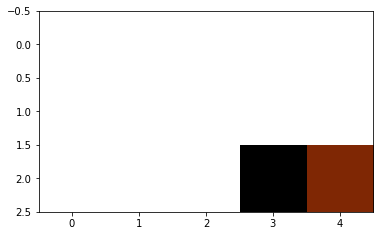

In [4]:
import pandas as pd
from evaluation.heatmaps import create_heatmap_for_slide_3class
import matplotlib.pyplot as plt

data = {'slide_id': ['a','a', 'b', 'b'], 'predictions': [[0.6,0.6,0.0], [0.05,0.25,0.4], 0.9, 0.4], 'coordinates': [(4,2), (3,2),(3,3),(32,2)], 'reference_value':[1,1,0,0]}
df = pd.DataFrame.from_dict(data)
hm0, hm1, hm2 = create_heatmap_for_slide_3class(df, 'a', 'd')
print(hm0, hm1, hm2)

cmap0 = plt.get_cmap('Oranges')
cmap1 = plt.get_cmap('Blues')
cmap2 = plt.get_cmap('Greys')
cmap0.set_under('k', alpha=0)
cmap1.set_under('k', alpha=0)
cmap2.set_under('k', alpha=0)
plt.figure()
plt.imshow(hm0, cmap=cmap0, vmin=0.0)
#plt.imshow(hm1, cmap=cmap1, vmin=0.0)
plt.imshow(hm2, cmap=cmap2, vmin=0.0)
plt.show()